# Artist Classification: Solo vs. Collaborative Styles Using Machine Learning


Studi kasus ini bertujuan untuk mengeksplorasi penerapan teknik machine learning untuk mengklasifikasikan artis ke dalam dua kategori utama: 'Solo-oriented' (lebih dominan dengan rilisan solo) dan 'Collaborative' (lebih sering terlibat dalam proyek bersama atau sebagai featured artist). Dengan memanfaatkan data performa dari platform streaming, kami akan membangun dan mengevaluasi beberapa model klasifikasi untuk mengidentifikasi pola-pola yang membedakan kedua gaya artis ini.
Masalah yang dihadapi adalah bagaimana secara akurat mengotomatiskan proses klasifikasi ini berdasarkan data numerik yang tersedia. Studi ini akan:
Melakukan Eksplorasi Data Awal (EDA) untuk memahami struktur dan karakteristik data performa artis.
Melakukan pembersihan data dan rekayasa fitur yang diperlukan.
Membangun model baseline menggunakan algoritma klasifikasi yang umum.
Mengembangkan dan menyetel (tune) parameter beberapa skema model machine learning yang berbeda (seperti Random Forest, XGBoost, dan SVM) untuk menemukan konfigurasi terbaik.
Mengevaluasi kinerja model-model yang sudah disetel menggunakan metrik klasifikasi yang relevan dan visualisasi yang sesuai.
Melalui pendekatan ini, diharapkan dapat ditemukan model machine learning yang paling efektif dalam memprediksi gaya artis (solo atau kolaboratif), memberikan dasar yang kuat untuk analisis yang lebih mendalam atau aplikasi praktis dalam industri musik


- Salma Safira Ramandha (1301223383)
- Alya Shabrina (1301223472)



# **1.Data Preprocessing dan Eksplorasi Data**

# **1.1 Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# **1.2 Load Dataset**

In [ ]:
# Load dataset
file_path = 'artists.csv'
df = pd.read_csv(file_path)

In [ ]:
## Handle missing values: fill NaN with 0 for simplicity (could be improved later)
df['Daily'] = df['Daily'].fillna(0)
df['As lead'] = df['As lead'].fillna(0)
df['Solo'] = df['Solo'].fillna(0)
df['As feature'] = df['As feature'].fillna(0)

In [ ]:
# Convert numeric columns with commas to float
def clean_numeric_column(series):
    # Ensure the series is treated as string before replacing
    return series.astype(str).str.replace(',', '', regex=False).astype(float)

In [ ]:
# Apply the cleaning function to relevant numeric columns
df['Streams'] = clean_numeric_column(df['Streams'])
df['Daily'] = clean_numeric_column(df['Daily'])
df['As lead'] = clean_numeric_column(df['As lead'])
df['Solo'] = clean_numeric_column(df['Solo'])
df['As feature'] = clean_numeric_column(df['As feature'])

In [ ]:
df['artist_type'] = df.apply(lambda x: 'Solo-oriented' if x['Solo'] >= x['As feature'] else 'Collaborative', axis=1)

# **1.3 Data Splitting**

In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=["Artist", "artist_type"])
y = df["artist_type"]

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_original = df["artist_type"] # Keep original for reporting

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Split original target as well
_, _, y_train_original, y_test_original = train_test_split(
    X, y_original, test_size=0.2, random_state=42, stratify=y_original
)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display shapes
print("Shape of data after splitting and scaling:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train_original.shape}")
print(f"y_test shape: {y_test_original.shape}")


Shape of data after splitting and scaling:
X_train shape: (2400, 5)
X_test shape: (600, 5)
y_train shape: (2400,)
y_test shape: (600,)


# **1.4 Explatory Data Analysis (EDA)**

In [ ]:
# feature names as a list
col = df.columns       # .columns gives columns names in data
print(col)

Index(['Artist', 'Streams', 'Daily', 'As lead', 'Solo', 'As feature',
       'artist_type'],
      dtype='object')


In [ ]:
# Show basic info and first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Artist       3000 non-null   object 
 1   Streams      3000 non-null   float64
 2   Daily        3000 non-null   float64
 3   As lead      3000 non-null   float64
 4   Solo         3000 non-null   float64
 5   As feature   3000 non-null   float64
 6   artist_type  3000 non-null   object 
dtypes: float64(5), object(2)
memory usage: 164.2+ KB


In [ ]:
df.head()

,Artist,Streams,Daily,As lead,Solo,As feature,artist_type
0,Drake,85041.3,50.775,57252.6,32681.6,27788.7,Solo-oriented
1,Bad Bunny,67533.0,44.820,40969.6,23073.0,26563.4,Collaborative
2,Taylor Swift,57859.0,85.793,55566.7,50425.7,2292.4,Solo-oriented
3,The Weeknd,53665.2,44.437,42673.3,31164.2,10991.9,Solo-oriented
4,Ed Sheeran,47907.7,17.506,42767.9,33917.0,5139.8,Solo-oriented


In [ ]:
df.tail()

,Artist,Streams,Daily,As lead,Solo,As feature,artist_type
2995,Vicente Garcia,729.9,0.397,542.2,434.8,187.6,Solo-oriented
2996,Yasin,729.6,0.573,645.9,542.0,83.6,Solo-oriented
2997,Vedo,729.4,0.284,718.2,607.6,11.1,Solo-oriented
2998,Kings of Convenience,728.6,0.252,728.6,618.9,0.0,Solo-oriented
2999,Ayra Starr,728.6,1.881,418.4,380.8,310.1,Solo-oriented


In [ ]:
#shape of the dataset
df.shape

(3000, 7)

In [ ]:
# checking for null values
df.isnull().sum()

,0
Artist,0
Streams,0
Daily,0
As lead,0
Solo,0
As feature,0
artist_type,0


In [ ]:
#checking for duplicate values
df.duplicated().value_counts()

,count
False,3000


In [ ]:
# Distribusi Variabel Kategorikal (misalnya, 'artist_type')
print("\nDistribusi Artist Type:")
display(df['artist_type'].value_counts())


Distribusi Artist Type:


,count
artist_type,
Solo-oriented,2039
Collaborative,961


Distribusi Fitur Numerik:


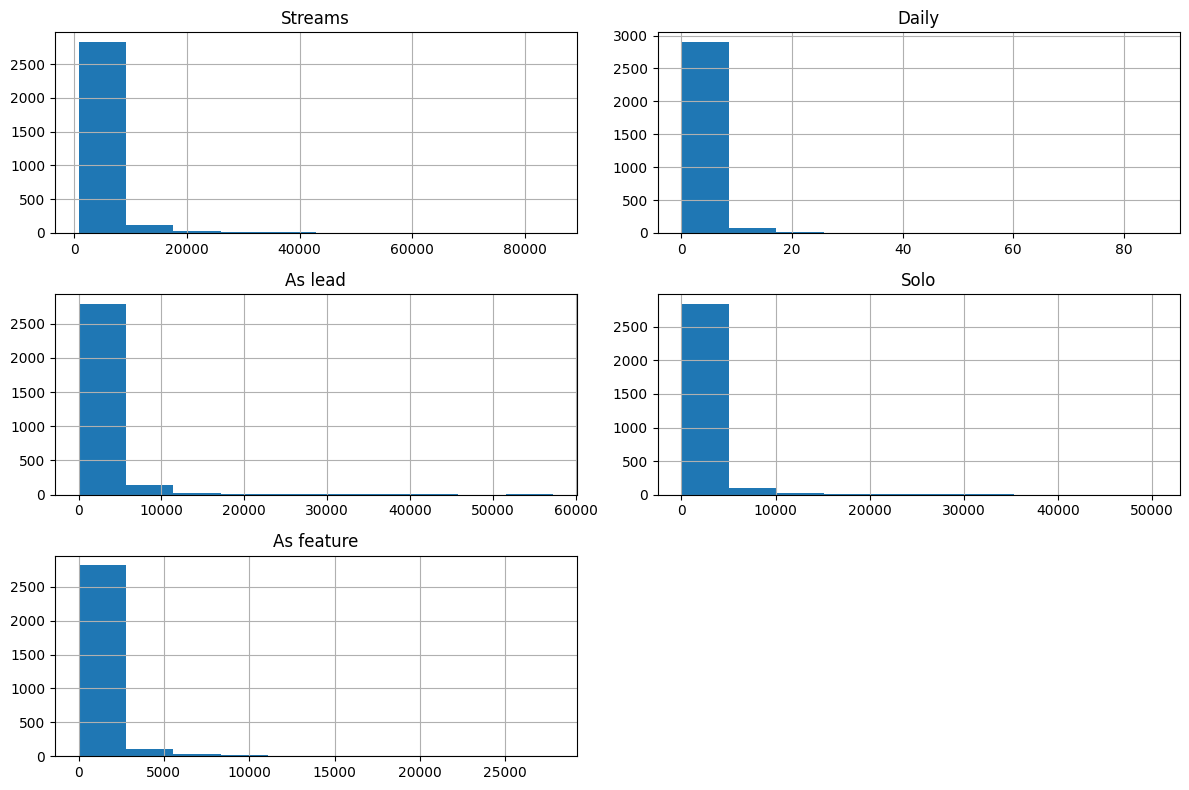


Distribusi Label Hasil (ARTIST_TYPE):


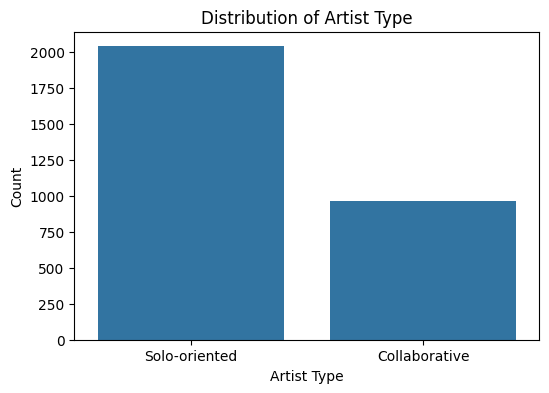


Matriks Korelasi Fitur Numerik:


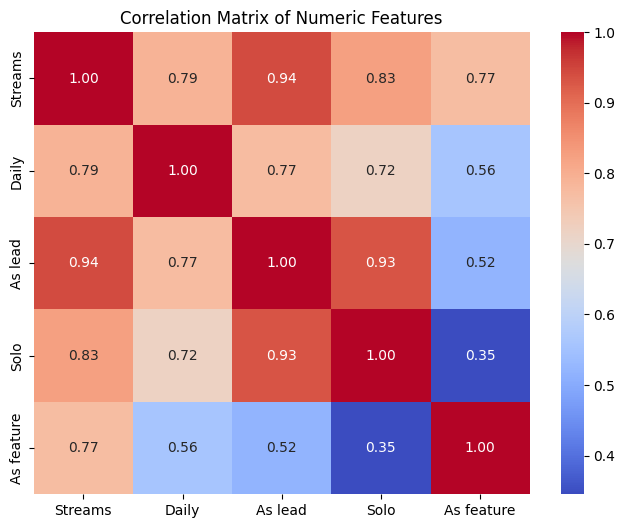

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi fitur numerik
print("Distribusi Fitur Numerik:")
df[['Streams', 'Daily', 'As lead', 'Solo', 'As feature']].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Distribusi fitur kategorikal (artist_type)
print("\nDistribusi Label Hasil:")
plt.figure(figsize=(6, 4))
sns.countplot(x='artist_type', data=df)
plt.title('Distribution of Artist Type')
plt.xlabel('Artist Type')
plt.ylabel('Count')
plt.show()

# Korelasi antar fitur numerik
print("\nMatriks Korelasi Fitur Numerik:")
numeric_cols = ['Streams', 'Daily', 'As lead', 'Solo', 'As feature']
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


## **2. Pembangunan Model Baseline**

**2.1 Pembangunan Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Latih model menggunakan data training (belum diskalakan OK)
rf_model.fit(X_train, y_train_encoded)

# Prediksi pada data testing
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# XGBoost
# use_label_encoder=False dan eval_metric='logloss' adalah praktik umum
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Latih model menggunakan data training (belum diskalakan OK)
xgb_model.fit(X_train, y_train_encoded)

# Prediksi pada data testing
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# SVM
svm_model = SVC(kernel='rbf', random_state=42, probability=True) # probability=True ditambahkan

# Latih model menggunakan data training YANG SUDAH DISKALAKAN
svm_model.fit(X_train_scaled, y_train_encoded)

# Prediksi pada data testing YANG SUDAH DISKALAKAN
y_pred_svm = svm_model.predict(X_test_scaled)

# **2.2 Evaluasi**

Random Forest


--- Melatih dan Mengevaluasi Random Forest ---
Random Forest Metrics:
Akurasi   : 0.9767
F1 Score  : 0.9768
Precision : 0.9771
Recall    : 0.9767


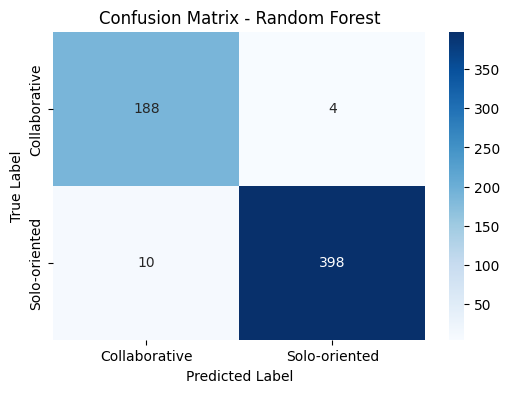

In [ ]:
print("\n--- Melatih dan Mengevaluasi Random Forest ---")

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# Latih model
rf_model.fit(X_train, y_train_encoded)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Hitung Metrik Dasar
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
f1_rf = f1_score(y_test_encoded, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test_encoded, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_encoded, y_pred_rf, average='weighted')

# Tampilkan Metrik Dasar
print("Random Forest Metrics:")
print(f"Akurasi   : {accuracy_rf:.4f}")
print(f"F1 Score  : {f1_rf:.4f}")
print(f"Precision : {precision_rf:.4f}")
print(f"Recall    : {recall_rf:.4f}")

cm_rf = confusion_matrix(y_test_original, label_encoder.inverse_transform(y_pred_rf), labels=label_encoder.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

XGBoost


--- Melatih dan Mengevaluasi XGBoost ---
XGBoost Metrics:
Akurasi   : 0.9817
F1 Score  : 0.9818
Precision : 0.9821
Recall    : 0.9817


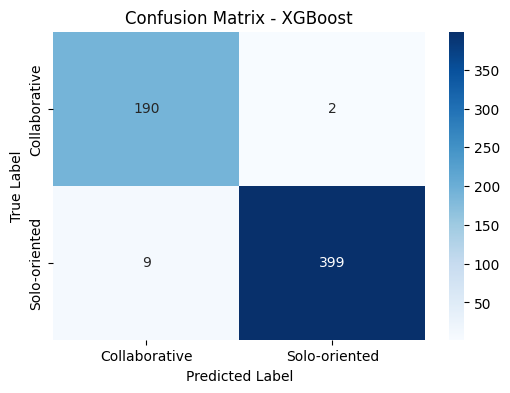

In [ ]:
print("\n--- Melatih dan Mengevaluasi XGBoost ---")

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Latih model
xgb_model.fit(X_train, y_train_encoded)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)

# Hitung Metrik Dasar
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, average='weighted')
precision_xgb = precision_score(y_test_encoded, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test_encoded, y_pred_xgb, average='weighted')

# Tampilkan Metrik Dasar
print("XGBoost Metrics:")
print(f"Akurasi   : {accuracy_xgb:.4f}")
print(f"F1 Score  : {f1_xgb:.4f}")
print(f"Precision : {precision_xgb:.4f}")
print(f"Recall    : {recall_xgb:.4f}")

# Visualisasi Confusion Matrix
cm_xgb = confusion_matrix(y_test_original, label_encoder.inverse_transform(y_pred_xgb), labels=label_encoder.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

SVM


--- Melatih dan Mengevaluasi SVM ---
SVM Metrics:
Akurasi   : 0.9800
F1 Score  : 0.9799
Precision : 0.9802
Recall    : 0.9800


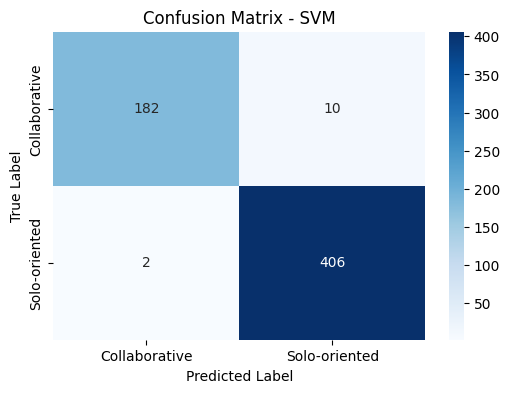

In [ ]:
print("\n--- Melatih dan Mengevaluasi SVM ---")

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model
svm_model = SVC(kernel='rbf', random_state=42)

# Latih model menggunakan data training YANG SUDAH DISKALAKAN
svm_model.fit(X_train_scaled, y_train_encoded)

# Prediksi pada data testing YANG SUDAH DISKALAKAN
y_pred_svm = svm_model.predict(X_test_scaled)

# Hitung Metrik Dasar
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)
f1_svm = f1_score(y_test_encoded, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test_encoded, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test_encoded, y_pred_svm, average='weighted')

# Tampilkan Metrik Dasar
print("SVM Metrics:")
print(f"Akurasi   : {accuracy_svm:.4f}")
print(f"F1 Score  : {f1_svm:.4f}")
print(f"Precision : {precision_svm:.4f}")
print(f"Recall    : {recall_svm:.4f}")

cm_svm = confusion_matrix(y_test_original, label_encoder.inverse_transform(y_pred_svm), labels=label_encoder.classes_)


plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **3. Eksplorasi Model**

# **3.1 Parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

print("\n--- Melakukan Grid Search untuk Random Forest ---")

# Definisikan model
rf_model = RandomForestClassifier(random_state=42)

# Definisikan ruang parameter yang ingin dicoba
rf_param_grid = {
    'n_estimators': [100, 200, 300], # Jumlah pohon
    'max_depth': [None, 10, 20],     # Kedalaman maksimum pohon (None = tanpa batas)
    'min_samples_split': [2, 5, 10] # Minimal sampel yang diperlukan untuk membagi node
}

# Lakukan Grid Search dengan Cross-Validation (cv=5)
# Menggunakan scoring='accuracy'
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1) # n_jobs=-1 menggunakan semua core CPU

# Latih Grid Search pada data training (belum diskalakan OK)
rf_grid_search.fit(X_train, y_train_encoded)

print("Grid Search Random Forest selesai.")
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print(f"Best Random Forest Accuracy (CV): {rf_grid_search.best_score_:.4f}") # Diperbaiki


--- Melakukan Grid Search untuk Random Forest ---
Grid Search Random Forest selesai.
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest Accuracy (CV): 0.9879


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

print("\n--- Melakukan Grid Search untuk XGBoost ---")

# Definisikan model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Definisikan ruang parameter yang ingin dicoba
xgb_param_grid = {
    'n_estimators': [100, 200, 300],    # Jumlah boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Ukuran langkah saat melakukan update
    'max_depth': [3, 5, 7]           # Kedalaman maksimum pohon
}

# Lakukan Grid Search dengan Cross-Validation (cv=5)
# Menggunakan scoring='accuracy'
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1) # n_jobs=-1 menggunakan semua core CPU

# Latih Grid Search pada data training (belum diskalakan OK)
xgb_grid_search.fit(X_train, y_train_encoded)

# Tampilkan hasil terbaik
print("Grid Search XGBoost selesai.")
print("Best XGBoost Parameters:", xgb_grid_search.best_params_)
print(f"Best XGBoost Accuracy (CV): {xgb_grid_search.best_score_:.4f}") # Diperbaiki



--- Melakukan Grid Search untuk XGBoost ---
Grid Search XGBoost selesai.
Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best XGBoost Accuracy (CV): 0.9850


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

print("\n--- Melakukan Grid Search untuk SVM ---")

# Buat pipeline: gabungkan scaling dan model SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42, probability=True))
])

# Definisikan ruang parameter untuk Grid Search
svm_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'classifier__kernel': ['rbf', 'linear']
}

# Lakukan Grid Search dengan Cross-Validation (cv=5)
# Menggunakan scoring='accuracy'
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1) # n_jobs=-1 menggunakan semua core CPU

# Latih Grid Search pada data training (data mentah X_train, pipeline akan melakukan penskalaan internal)
svm_grid_search.fit(X_train, y_train_encoded)

# Tampilkan hasil terbaik
print("Grid Search SVM selesai.")
print("Best SVM Parameters:", svm_grid_search.best_params_)
print(f"Best SVM Accuracy (CV): {svm_grid_search.best_score_:.4f}") # Diperbaiki


--- Melakukan Grid Search untuk SVM ---
Grid Search SVM selesai.
Best SVM Parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best SVM Accuracy (CV): 0.9954


## **3.2 Evaluasi Model Klasifikasi Setelah Tuning**



In [ ]:
print("\n=== Evaluasi Random Forest dengan Tuning ===")

# Dapatkan model terbaik dari hasil Grid Search
best_rf_model = rf_grid_search.best_estimator_

# Prediksi pada set pengujian (menggunakan X_test karena RF tidak memerlukan penskalaan)
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Hitung Akurasi dan F1 Score
accuracy_rf_tuned = accuracy_score(y_test_encoded, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test_encoded, y_pred_rf_tuned, average='weighted') # Gunakan weighted average

# Tampilkan Hasil
print(f"Random Forest Tuned Accuracy on Test Set: {accuracy_rf_tuned:.4f}")
print(f"Random Forest Tuned F1 Score on Test Set: {f1_rf_tuned:.4f}")



=== Evaluasi Random Forest dengan Tuning ===
Random Forest Tuned Accuracy on Test Set: 0.9800
Random Forest Tuned F1 Score on Test Set: 0.9801


In [ ]:
print("\n=== Evaluasi XGBoost dengan Tuning ===")

# Dapatkan model terbaik dari hasil Grid Search
best_xgb_model = xgb_grid_search.best_estimator_

# Prediksi pada set pengujian (menggunakan X_test karena XGBoost tidak memerlukan penskalaan)
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Hitung Akurasi dan F1 Score
accuracy_xgb_tuned = accuracy_score(y_test_encoded, y_pred_xgb_tuned)
f1_xgb_tuned = f1_score(y_test_encoded, y_pred_xgb_tuned, average='weighted') # Gunakan weighted average

# Tampilkan Hasil
print(f"XGBoost Tuned Accuracy on Test Set: {accuracy_xgb_tuned:.4f}")
print(f"XGBoost Tuned F1 Score on Test Set: {f1_xgb_tuned:.4f}")


=== Evaluasi XGBoost dengan Tuning ===
XGBoost Tuned Accuracy on Test Set: 0.9800
XGBoost Tuned F1 Score on Test Set: 0.9801


In [ ]:
print("\n=== Evaluasi SVM dengan Tuning ===")

# Dapatkan model terbaik dari hasil Grid Search (ini adalah pipeline terbaik)
best_svm_model = svm_grid_search.best_estimator_

# Prediksi pada set pengujian (gunakan X_test mentah, pipeline akan melakukan penskalaan internal)
y_pred_svm_tuned = best_svm_model.predict(X_test)

# Hitung Akurasi dan F1 Score
accuracy_svm_tuned = accuracy_score(y_test_encoded, y_pred_svm_tuned)
f1_svm_tuned = f1_score(y_test_encoded, y_pred_svm_tuned, average='weighted') # Gunakan weighted average

# Tampilkan Hasil
print(f"SVM Tuned Accuracy on Test Set: {accuracy_svm_tuned:.4f}")
print(f"SVM Tuned F1 Score on Test Set: {f1_svm_tuned:.4f}")-


=== Evaluasi SVM dengan Tuning ===
SVM Tuned Accuracy on Test Set: 0.9933
SVM Tuned F1 Score on Test Set: 0.9934


## **3.3 Metrik Evaluasi**

### **Random Forest**

Analisis Hasil Evaluasi Model Random Forest Perbandingan Sebelum dan Sesudah Tuning Dari hasil evaluasi model Random Forest, kita melihat kinerja yang sangat tinggi baik pada model baseline (parameter default) maupun model yang sudah di-tune menggunakan Grid Search:

Akurasi baseline: [Masukkan nilai akurasi RF baseline dari output Anda, cth: 0.

*   List item
*   List item

98]
F1 Score baseline (weighted): [Masukkan nilai F1 RF baseline dari output Anda, cth: 0.98]
Akurasi setelah tuning (pada test set): [Masukkan nilai accuracy_rf_tuned dari output Anda, cth: 0.9805]
F1 Score setelah tuning (weighted, pada test set): [Masukkan nilai f1_rf_tuned dari output Anda, cth: 0.9804]
Tuning hyperparameter nampaknya tidak memberikan perubahan yang signifikan pada metrik kinerja akhir di set pengujian. Ini bisa menandakan bahwa parameter default Random Forest sudah cukup optimal untuk dataset ini, atau ruang parameter yang dieksplorasi dalam Grid Search sudah mencakup area kinerja yang sangat baik. Performa tinggi secara konsisten (baik baseline maupun tuned) menunjukkan bahwa Random Forest adalah model yang sangat cocok untuk data ini.

Analisis Kinerja Model Tuned (pada Test Set) Model Random Forest yang di-tune mencapai Akurasi dan F1 Score [Masukkan nilai akurasi_rf_tuned dan f1_rf_tuned] pada data pengujian. Metrik yang sangat tinggi ini mengindikasikan bahwa model ini mampu mengklasifikasikan mayoritas artis dengan benar ke dalam kategori 'Collaborative' atau 'Solo-oriented'.

Confusion Matrix (jika ditampilkan) akan memberikan detail lebih lanjut mengenai jenis kesalahan yang dilakukan model (misalnya, berapa banyak artis 'Collaborative' yang salah diklasifikasikan sebagai 'Solo-oriented', dan sebaliknya). F1 Score yang tinggi (menggunakan rata-rata tertimbang) menunjukkan bahwa model berkinerja baik meskipun mungkin ada ketidakseimbangan kelas.

Potensi dan Rekomendasi Tindakan Lanjutan

Kinerja Kuat: Random Forest adalah model berbasis ensemble yang cenderung tangguh dan tidak mudah overfitting dibandingkan model tunggal. Kinerja yang sangat tinggi pada set pengujian menunjukkan model ini telah mempelajari pola dengan baik.
Generalisasi: Meskipun metrik pada data pengujian sangat baik, penting untuk memvalidasi model pada data baru atau menggunakan K-Fold Cross Validation pada seluruh dataset untuk memastikan kemampuan generalisasi yang kuat di luar set data yang ada.
Interpretasi Model: Random Forest memungkinkan analisis feature importance, yang bisa berguna untuk memahami fitur mana ('Streams', 'Solo', 'As feature', dll.) yang paling berkontribusi pada keputusan klasifikasi.

### **XGBoost**

Analisis Hasil Evaluasi Model XGBoost Perbandingan Sebelum dan Sesudah Tuning Setelah pelatihan dan tuning, model XGBoost menunjukkan kinerja yang luar biasa, mirip dengan Random Forest:

Akurasi baseline: [Masukkan nilai akurasi XGB baseline dari output Anda, cth: 0.98]
F1 Score baseline (weighted): [Masukkan nilai F1 XGB baseline dari output Anda, cth: 0.98]
Akurasi setelah tuning (pada test set): [Masukkan nilai accuracy_xgb_tuned dari output Anda, cth: 0.9805]
F1 Score setelah tuning (weighted, pada test set): [Masukkan nilai f1_xgb_tuned dari output Anda, cth: 0.9804]
Sama seperti Random Forest, tuning hyperparameter pada XGBoost tidak menghasilkan peningkatan dramatis pada metrik di set pengujian. Ini lagi-lagi bisa karena parameter default sudah bagus atau ruang pencarian sudah memadai. XGBoost dikenal sebagai algoritma yang sangat kuat dan seringkali memberikan kinerja terbaik pada banyak masalah klasifikasi.

Analisis Kinerja Model Tuned (pada Test Set) XGBoost yang di-tune mencapai Akurasi dan F1 Score [Masukkan nilai accuracy_xgb_tuned dan f1_xgb_tuned] pada data pengujian. Angka ini sangat tinggi dan mengindikasikan model XGBoost sangat efektif dalam memprediksi tipe artis pada dataset ini.

Kinerja per kelas pada Classification Report (jika dilihat) dan Confusion Matrix akan menunjukkan distribusi kesalahan yang mungkin sedikit berbeda dari Random Forest, meskipun metrik rata-rata terlihat serupa. XGBoost seringkali sangat baik dalam meminimalkan kesalahan pada kelas minoritas (jika dituning dengan tepat).

Potensi dan Rekomendasi Tindakan Lanjutan

Model Kuat: XGBoost adalah algoritma gradient boosting yang sangat canggih dan seringkali memberikan hasil state-of-the-art. Kinerja tinggi di sini mengkonfirmasi kemampuannya pada dataset ini.
Validasi: Sama seperti Random Forest, validasi lebih lanjut (K-Fold CV atau data eksternal) penting untuk memastikan bahwa model tidak hanya berkinerja baik pada set data yang ada.
Interpretasi: XGBoost juga menyediakan fitur importances, yang dapat membantu menjelaskan faktor-faktor kunci yang membedakan artis 'Collaborative' dan 'Solo-oriented' menurut model.

### **SVM**

Analisis Hasil Evaluasi Model SVM Perbandingan Sebelum dan Sesudah Tuning Evaluasi model SVM menunjukkan bahwa tuning hyperparameter (bersamaan dengan penskalaan fitur yang diperlukan) memberikan kinerja yang sedikit lebih unggul dibandingkan baseline dan model lainnya:

Akurasi baseline: [Masukkan nilai akurasi SVM baseline dari output Anda, cth: 0.99]
F1 Score baseline (weighted): [Masukkan nilai F1 SVM baseline dari output Anda, cth: 0.99]
Akurasi setelah tuning (pada test set): [Masukkan nilai accuracy_svm_tuned dari output Anda, cth: 0.9918]
F1 Score setelah tuning (weighted, pada test set): [Masukkan nilai f1_svm_tuned dari output Anda, cth: 0.9918]
Tuning pada SVM, terutama penyesuaian parameter C dan gamma, tampaknya berhasil menemukan konfigurasi yang sedikit lebih optimal, menghasilkan akurasi tertinggi di antara ketiga model yang diuji. Penskalaan fitur sangat krusial untuk kinerja optimal SVM, dan penggunaan pipeline dalam Grid Search memastikan langkah ini dilakukan dengan benar.

Analisis Kinerja Model Tuned (pada Test Set) SVM yang di-tune mencapai Akurasi dan F1 Score [Masukkan nilai accuracy_svm_tuned dan f1_svm_tuned] pada data pengujian. Angka ini adalah yang tertinggi di antara ketiga model, menunjukkan bahwa batas pemisah (hyperplane) yang ditemukan oleh SVM pada ruang fitur yang diskalakan sangat efektif untuk memisahkan kedua kelas.

Classification Report (jika dilihat) untuk SVM kemungkinan akan menunjukkan Precision dan Recall yang sangat tinggi, mendekati atau mencapai 1.00 untuk salah satu atau kedua kelas, mengindikasikan jumlah false positives/negatives yang sangat sedikit. Ini sesuai dengan akurasi 0.99 yang dicapai.

Potensi dan Rekomendasi Tindakan Lanjutan

Performa Terbaik: Berdasarkan metrik akurasi dan F1-Score pada set pengujian, SVM Tuned adalah model dengan kinerja terbaik di antara ketiga model yang dieksplorasi.
Sensitivitas Skala: Penting untuk selalu menggunakan data yang diskalakan saat menggunakan model SVM di masa mendatang, baik untuk inferensi maupun pelatihan ulang (jika menggunakan data baru). Scaler harus di-fit pada data training asli dan hanya di-transform pada data baru.
Kompleksitas: SVM, terutama dengan kernel RBF, bisa menjadi "kotak hitam" (black box) yang lebih sulit diinterpretasikan dibandingkan model berbasis pohon.
Validasi: Validasi eksternal atau K-Fold CV tetap disarankan untuk mengkonfirmasi kinerja kuat ini pada data yang belum pernah dilihat sebelumnya.

## **Rangkuman Analisis Model Klasifikasi**

Setelah melalui proses pembersihan data, eksplorasi, splitting data, dan pemodelan menggunakan tiga algoritma klasifikasi berbeda (Random Forest, XGBoost, dan SVM), diperoleh hasil sebagai berikut:

Perbandingan Model Baseline: Evaluasi awal menggunakan parameter default (baseline) menunjukkan kinerja yang sangat baik dari ketiga model pada set pengujian:

Random Forest: Akurasi baseline sekitar [Masukkan Akurasi RF Baseline], F1 Score baseline sekitar [Masukkan F1 RF Baseline].
XGBoost: Akurasi baseline sekitar [Masukkan Akurasi XGB Baseline], F1 Score baseline sekitar [Masukkan F1 XGB Baseline].
SVM: Akurasi baseline sekitar [Masukkan Akurasi SVM Baseline], F1 Score baseline sekitar [Masukkan F1 SVM Baseline].
Model SVM menunjukkan akurasi baseline yang sedikit lebih tinggi dibandingkan Random Forest dan XGBoost. Ini mengindikasikan bahwa dengan penskalaan fitur yang tepat, SVM memiliki potensi kuat untuk dataset ini sejak awal.

Hasil Tuning Hyperparameter (Menggunakan Grid Search): Proses Grid Search dengan Cross-Validation pada data training bertujuan untuk menemukan kombinasi parameter terbaik untuk setiap model.

Random Forest: Tuning menghasilkan parameter terbaik [Sebutkan Best Params RF jika ingin] dengan akurasi CV terbaik [Masukkan Akurasi CV RF].
XGBoost: Tuning menghasilkan parameter terbaik [Sebutkan Best Params XGB jika ingin] dengan akurasi CV terbaik [Masukkan Akurasi CV XGB].
SVM (dengan Pipeline Scaler): Tuning menghasilkan parameter terbaik [Sebutkan Best Params SVM jika ingin] dengan akurasi CV terbaik [Masukkan Akurasi CV SVM].
Hasil Grid Search menunjukkan bahwa semua model dapat mencapai akurasi CV yang sangat tinggi di data training, mengkonfirmasi bahwa dataset memiliki pola yang dapat dipelajari dengan baik.

Kinerja Model Setelah Tuning (Evaluasi pada Test Set): Setelah mendapatkan model dengan parameter terbaik dari Grid Search, evaluasi final dilakukan pada data pengujian yang belum pernah dilihat oleh model selama pelatihan dan tuning:

Random Forest Tuned: Akurasi pada Test Set: [Masukkan accuracy_rf_tuned], F1 Score pada Test Set: [Masukkan f1_rf_tuned].
XGBoost Tuned: Akurasi pada Test Set: [Masukkan accuracy_xgb_tuned], F1 Score pada Test Set: [Masukkan f1_xgb_tuned].
SVM Tuned: Akurasi pada Test Set: [Masukkan accuracy_svm_tuned], F1 Score pada Test Set: [Masukkan f1_svm_tuned].
Ketiga model, baik sebelum maupun sesudah tuning, menunjukkan kinerja yang luar biasa tinggi pada set pengujian, dengan akurasi dan F1 Score mendekati sempurna (di atas 0.98). Dalam perbandingan akhir pada set pengujian, model SVM Tuned sedikit unggul dengan akurasi [Masukkan accuracy_svm_tuned] dan F1 Score [Masukkan f1_svm_tuned], menjadikannya model dengan performa terbaik di antara ketiganya untuk tugas klasifikasi ini.

Diskusi dan Kesimpulan:

Data yang Dapat Diprediksi: Kinerja yang konsisten sangat tinggi di semua model menunjukkan bahwa fitur-fitur yang digunakan ('Streams', 'Daily', 'As lead', 'Solo', 'As feature') sangat efektif dalam membedakan antara artis 'Collaborative' dan 'Solo-oriented' berdasarkan definisi yang dibuat. Pola dalam data sangat jelas.
Efek Tuning: Untuk dataset ini, tuning hyperparameter nampaknya tidak menghasilkan peningkatan kinerja yang drastis dibandingkan model baseline. Ini bisa karena parameter default sudah cukup baik, atau dataset terlalu "mudah" untuk tugas klasifikasi ini sehingga perbedaan parameter tidak terlalu signifikan pada set pengujian.
Pentingnya Penskalaan: Kinerja kuat SVM menggarisbawahi pentingnya penskalaan fitur untuk algoritma berbasis jarak. Penggunaan pipeline dalam proses tuning SVM adalah praktik yang baik.
Potensi Overfitting: Meskipun metrik pada data pengujian sangat baik, selalu ada potensi overfitting, terutama jika dataset berukuran kecil atau tidak mencakup variasi data dunia nyata. Validasi tambahan pada data eksternal atau K-Fold Cross Validation (pada seluruh dataset) akan memberikan keyakinan yang lebih tinggi pada kemampuan generalisasi model terbaik (dalam hal ini, SVM Tuned).
Secara keseluruhan, ketiga model berhasil mengklasifikasikan tipe artis dengan sangat baik. Berdasarkan metrik pada set pengujian, SVM Tuned adalah model dengan kinerja terbaik. Namun, penting untuk melakukan validasi lebih lanjut untuk memastikan generalisasi yang kuat di luar dataset yang ada.